In [4]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [5]:
clf = tree.DecisionTreeClassifier()


In [8]:
df = pd.read_excel("transformeddata2.xlsx")
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df = df.fillna(df.mean())
df1 = df.fillna(method='ffill')


In [10]:
ysplit = df1['Person Type']
xsplit = df1.drop(['Person Type'],axis=1)
dt = xsplit.select_dtypes(include=['datetime64'])
cat2 = list(dt.columns)
categorical = xsplit.select_dtypes(exclude=['float64'])
cat3 = list(categorical.columns)
cols = cat2 + cat3
le = preprocessing.LabelEncoder()
xsplit[cols] = xsplit[cols].apply(lambda col: le.fit_transform(col))


In [11]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(xsplit,ysplit)

In [13]:
xtrain, xtest = train_test_split(xsplit, test_size=0.2, shuffle=False)
ytrain, ytest = train_test_split(ysplit, test_size=0.2, shuffle=False)

In [14]:
clf = clf.fit(xtrain,ytrain)

In [15]:
ypred = clf.predict(xtest)

In [18]:
result = accuracy_score(ytest,ypred)
print("The accuracy using Decision Tree classifier is {}".format(result))

The accuracy using Decision Tree classifier is 0.9855


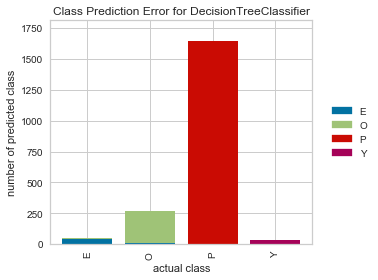

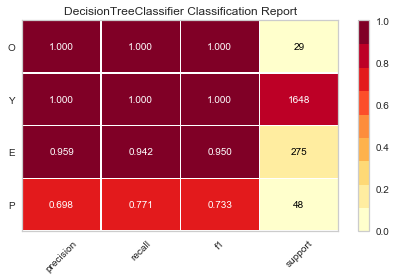

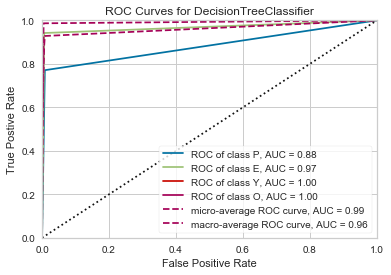

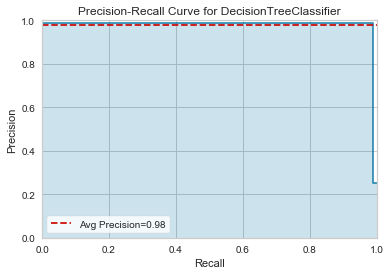

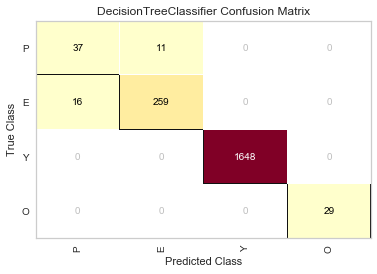

In [19]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
model = tree.DecisionTreeClassifier()
viz = ClassPredictionError(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

classes = ["P", "E", "Y", "O"]
viz = ClassificationReport(model, classes=classes, support=True)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["P", "E", "Y", "O"]
viz = ROCAUC(model, classes=classes)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
viz = PrecisionRecallCurve(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["P", "E", "Y", "O"]
viz = ConfusionMatrix(model,classes=classes,label_encoder={0: 'P', 1: 'E', 2: 'Y', 3: 'O'})
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()